# PyTorch Workflow

Let's explore an example PyTorch end-to-end workflow

Resources:
* Ground truth notebook - https://github.com/mrdbourke/pytorch-deep-learning/blob/main/01_pytorch_workflow.ipynb
* Book version of notebook - https://www.learnpytorch.io/01_pytorch_workflow/
* Ask a question - https://github.com/mrdbourke/pytorch-deep-learning/discussions


In [1]:
from statistics import LinearRegression

what_were_covering = {
    1: "data (prepare and load)",
    2: "build model",
    3: "fitting the model to data (training)",
    4: "making predictions and evaluating model (inference)",
    5: "saving and loading a model",
    6: "putting it all together"
}
what_were_covering

{1: 'data (prepare and load)',
 2: 'build model',
 3: 'fitting the model to data (training)',
 4: 'making predictions and evaluating model (inference)',
 5: 'saving and loading a model',
 6: 'putting it all together'}

In [2]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.7.1'

## 1. Data (preparing and loading)

Data can be almost anything... in machine learning.
* Excel spreadsheet
* Images of any kind
* Videos (YouTube has lots of data)
* Audio like songs or podcasts
* DNA
* Text

Machine Learning is a game of two parts:
1. Get data into numerical representation.
2. Build a model to learn patterns in that numerical representation.

To showcase this, let's create some *known* data using the linear regression formula.

We'll use a linear regression formula to make a straight line with known **parameters**.

In [3]:
# Create *known* parameters
weight = 0.7
bias = 0.3

# Create
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(1)
y = weight*X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

### Splitting data into training and test sets
**(one of the most important concepts in machine learning in general)**

Let's create a training and test set with our data

In [4]:
# Create a train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

How might we better visualize our data?

This is where the data explorer's motto comes in!

"Visualize, visualize, visualize!"

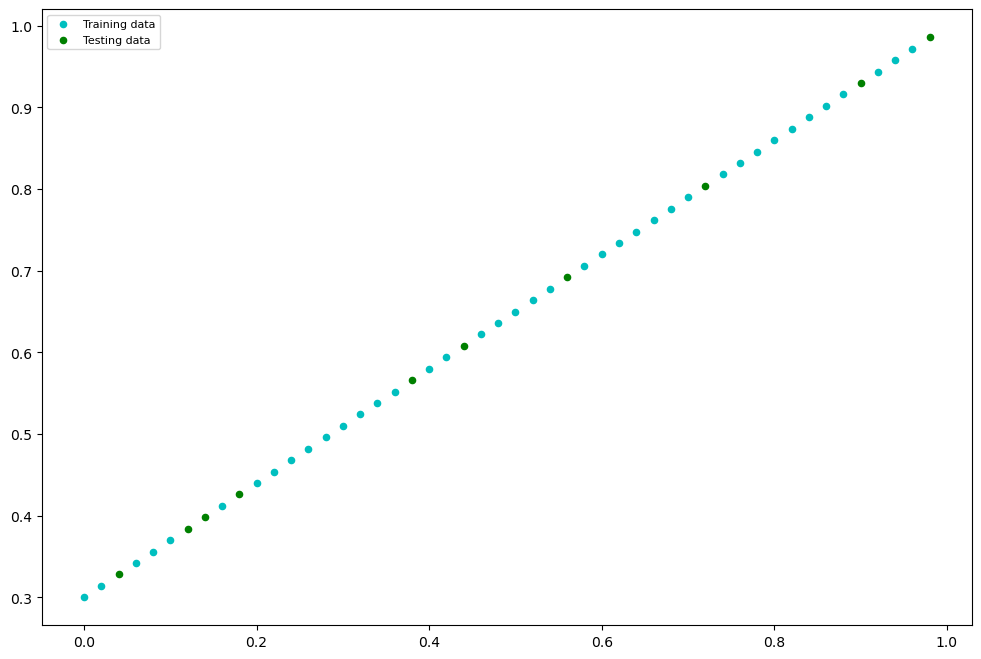

In [49]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
    """
    Plots training data, test data, and compare predictions.
    :param train_data:
    :param train_labels:
    :param test_data:
    :param test_labels:
    :param predictions:
    :return:
    """
    plt.figure(figsize=(12, 8))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="c", s=20, label="Training data")

    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=20, label="Testing data")

    # Are there predictions?
    if predictions is not None:
        # Plot the predictions if they exist
        plt.scatter(test_data, predictions, c="r", s=20, label="Predictions")

    # Show the legend
    plt.legend(prop={'size': 8})
plot_predictions()

## 2. Build model

Our first PyTorch model!!

What our model does:
* Starty with random values (weight and bias)
* Look at training data and adjust the random values (the weight and bias values we used to create the data)

How does it do so?

Through two main algorithms:
1. Gradient descent - https://youtu.be/lHZwWFHWa-w
2. Backpropagation - https://youtu.be/llg3gGewQ5U

In [6]:
# Create linear regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in
    def __init__(self):
        super().__init__()
        self.weight = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    # Forward method to define the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data
        return x * self.weight + self.bias # this is the linear regression formula

### PyTorch model building essentials

* torch.nn - contains all the buildings for computational graphs (a neural network can be considered a computational graph)
* torch.nn.Parameter - what parameters should our model try and learn, often a PyTorch layer from torch.nn will set these for us
* torch.nn.Module - The base class for all neural network modules, if you subclass it, you should overwrite forward()
* torch.optim - this where the optimizers in PyTorch live, they will help with gradient descent
* def forward() - All nn.Module subclasses require you to overwrite forward(), this method defines what happens in the forward computation

See more of these essential modules via PyTorch cheatsheet - https://pytorch.org/tutorials/beginner/ptcheat.html

### Checking the contents of our PyTorch model

Now we've created a model, let's see what's inside...

So we can check our model parameters or what's inside our model using `.parameters()`.

In [7]:
# Create a random seed
torch.manual_seed(42)

# Create an instance of the model (this is a subclass of nn.Module)
model_0 = LinearRegressionModel()

# Check out the parameters
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [8]:
# List named parameters
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making prediction using `torch.inference_mode()`

To check our model's predictive power, let's see how well it predicts `y_test` based on `X_test`.

When we pass data through our model, it's going to run through the `forward()` method.

In [9]:
X_test, y_test

(tensor([[0.1400],
         [0.1800],
         [0.1200],
         [0.8200],
         [0.3200],
         [0.0000],
         [0.7200],
         [0.7800],
         [0.6000],
         [0.8400]]),
 tensor([[0.3980],
         [0.4260],
         [0.3840],
         [0.8740],
         [0.5240],
         [0.3000],
         [0.8040],
         [0.8460],
         [0.7200],
         [0.8880]]))

In [10]:
# Make predictions with model
with torch.inference_mode():
    y_preds = model_0(X_test)
y_preds

tensor([[0.1759],
        [0.1894],
        [0.1692],
        [0.4049],
        [0.2366],
        [0.1288],
        [0.3712],
        [0.3914],
        [0.3308],
        [0.4116]])

In [11]:
y_test

tensor([[0.3980],
        [0.4260],
        [0.3840],
        [0.8740],
        [0.5240],
        [0.3000],
        [0.8040],
        [0.8460],
        [0.7200],
        [0.8880]])

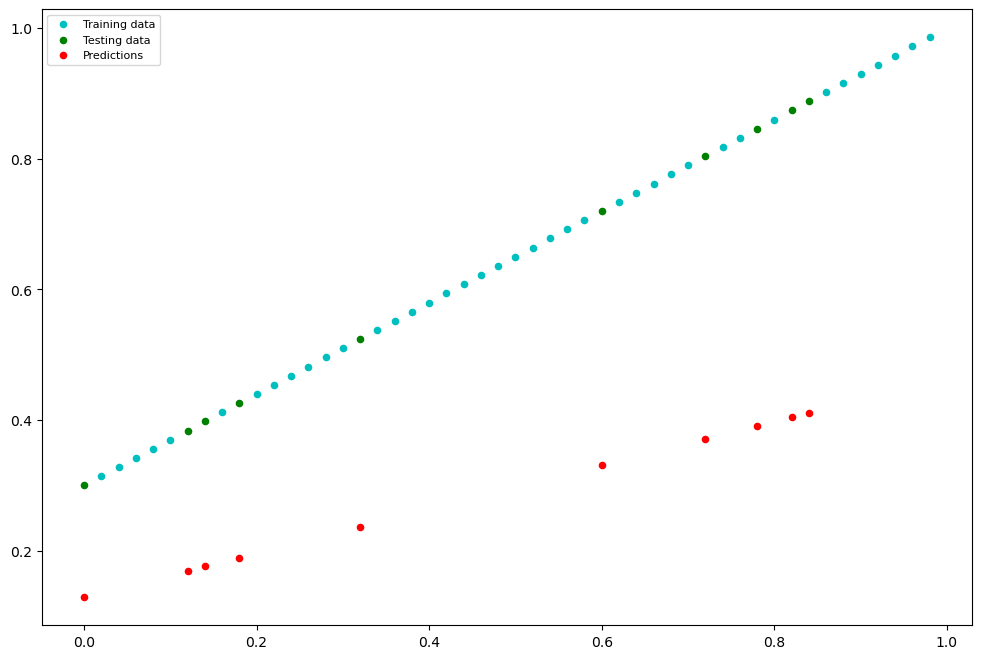

In [12]:
plot_predictions(predictions=y_preds)

See more on inference mode here - https://twitter.com/PyTorch/status/1437838231505096708?s=20&t=cnKav09iTgwQ-rfri6u7PQ

## 3. Train model

The whole idea of training a model is for a model to move from some *unknown* parameters (these may be random) to some known parameters.

Or in other words, from a poor representation of the data to a better representation of the data.

One way to measure how poor or how wrong your model predictions are is to use a loss function.

* Note: Loss function may also be called cost function or criterion in different areas. For our case, we're going to refer it as a loss function.
* **Loss function:** A function to measure how wrong your model's predictions are to ideal outputs, lower is better.
* **Optimizer:** Takes into account the loss of a model and adjusts the model's parameters (e.g., weight & bias)

And specifically for PyTorch, we need:
* A training loop
* A testing loop

In [13]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [14]:
# Check out our model's parameters (a parameter is a value that the model sets itself)
model_0.state_dict()

OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [15]:
# Setup a loss function
loss_fn = nn.L1Loss()

# Setup an optimizer
optimizer = torch.optim.SGD(model_0.parameters(),
                            lr=0.001) # lr = learning rate = possibly the most important hyperparameter you can set

> **Q:** Which loss function and optimizer should I use?
> **A:** This will be problem specific. But with experience, you'll get an idea of what works and what doesn't with your particular problem set.
>
> For example, for a regression problem (like ours), a loss function of `nn.L1Loss()` and an optimizer like `torch.optim.SGD()` will suffice.
>
> But for a classification problem like classifying whether a photo is of a dog or a cat, you'll likely want to use a loss function of `nn.BCELoss()` (binary cross entropy loss).

### Building a training loop (and a testing loop) in PyTorch

A couple of things we need in a training loop:
0. Loop through the data
1. Forward pass (this involves data moving through our model's `forward()` functions) to make predictions on data - also called forward propagation
2. Calculate the loss (compare forward pass prediction to ground truth labels)
3. Optimizer zero grad
4. Loss backward - move backwards through the network to calculate the gradients of each of the parameters of our model with respect to the loss (**Backpropagation**)
5. Optimizer step - use the optimizer to adjust our model's parameters to try and improve the loss (**gradient decent**)

In [16]:
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [17]:
torch.manual_seed(42)

# An epoch is one loop through the data... (this is a hyperparameter because we've set it ourselves)
epochs = 1_500

# Track different values
epoch_count = []
loss_values = []
train_loss_values = []

### Training
# 0. Loop through the data
for epoch in range(epochs):
    # Set the model to training mode
    model_0.train() # train mode in PyTorch sets all parameters that require gradients to require gradients

    # 1. Forward pass
    y_pred = model_0(X_train)

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y_train)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Perform backpropagation on the loss with respect to the parameters of the model
    loss.backward()

    # 5. Step the optimizer (perform gradient descent)
    optimizer.step() # by default, how the optimizer changes will accumulate through the loop so... we have to zero them above in step 3 for the next iteration of the loop

    ### Testing
    model_0.eval() # turns off different settings in the model not needed for evaluation/testing (dropout/bach norm layers)
    with torch.inference_mode(): # turns off gradient tracking and a couple more things behind the scenes
    # with torch.no_grad(): # you may also see torch.no_grad() in older PyTorch code
        # 1. Do the forward pass
        test_pred = model_0(X_test)

        # 2. Calculate the loss

        test_loss = loss_fn(test_pred, y_test)

    # print what's happening
    if epoch % 10 == 0:
        epoch_count.append(epoch)
        loss_values.append(loss.item())
        train_loss_values.append(test_loss.item())
        print(f"Epoch {epoch} | Loss: {loss} | Test Loss: {test_loss}")
        # print out model state_dict()
        print(model_0.state_dict())

Epoch 0 | Loss: 0.3526637554168701 | Test Loss: 0.3341807723045349
OrderedDict({'weight': tensor([0.3372]), 'bias': tensor([0.1298])})
Epoch 10 | Loss: 0.3401688039302826 | Test Loss: 0.32192307710647583
OrderedDict({'weight': tensor([0.3422]), 'bias': tensor([0.1398])})
Epoch 20 | Loss: 0.32767385244369507 | Test Loss: 0.30966538190841675
OrderedDict({'weight': tensor([0.3472]), 'bias': tensor([0.1498])})
Epoch 30 | Loss: 0.31517890095710754 | Test Loss: 0.29740768671035767
OrderedDict({'weight': tensor([0.3522]), 'bias': tensor([0.1598])})
Epoch 40 | Loss: 0.30268391966819763 | Test Loss: 0.2851499915122986
OrderedDict({'weight': tensor([0.3572]), 'bias': tensor([0.1698])})
Epoch 50 | Loss: 0.2901889681816101 | Test Loss: 0.2728922963142395
OrderedDict({'weight': tensor([0.3622]), 'bias': tensor([0.1798])})
Epoch 60 | Loss: 0.2776940166950226 | Test Loss: 0.26063457131385803
OrderedDict({'weight': tensor([0.3672]), 'bias': tensor([0.1898])})
Epoch 70 | Loss: 0.26519903540611267 | Tes

In [18]:
with torch.inference_mode():
    y_preds_new = model_0(X_test)
y_preds_new

tensor([[0.3987],
        [0.4267],
        [0.3847],
        [0.8743],
        [0.5246],
        [0.3007],
        [0.8044],
        [0.8464],
        [0.7204],
        [0.8883]])

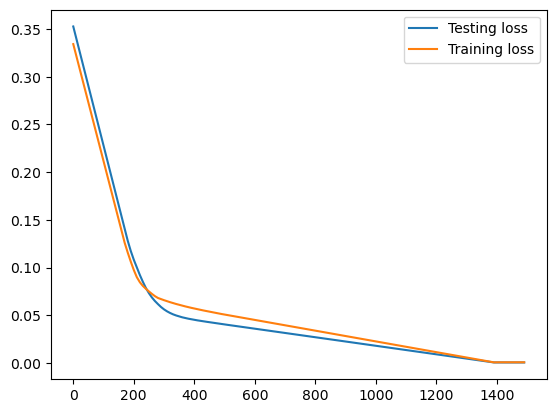

In [19]:
# Plot the loss curves
plt.plot(epoch_count, loss_values, label="Testing loss")
plt.plot(epoch_count, train_loss_values, label="Training loss")
plt.legend()
plt.show()

In [20]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.6995])), ('bias', tensor([0.3007]))])

In [21]:
weight, bias

(0.7, 0.3)

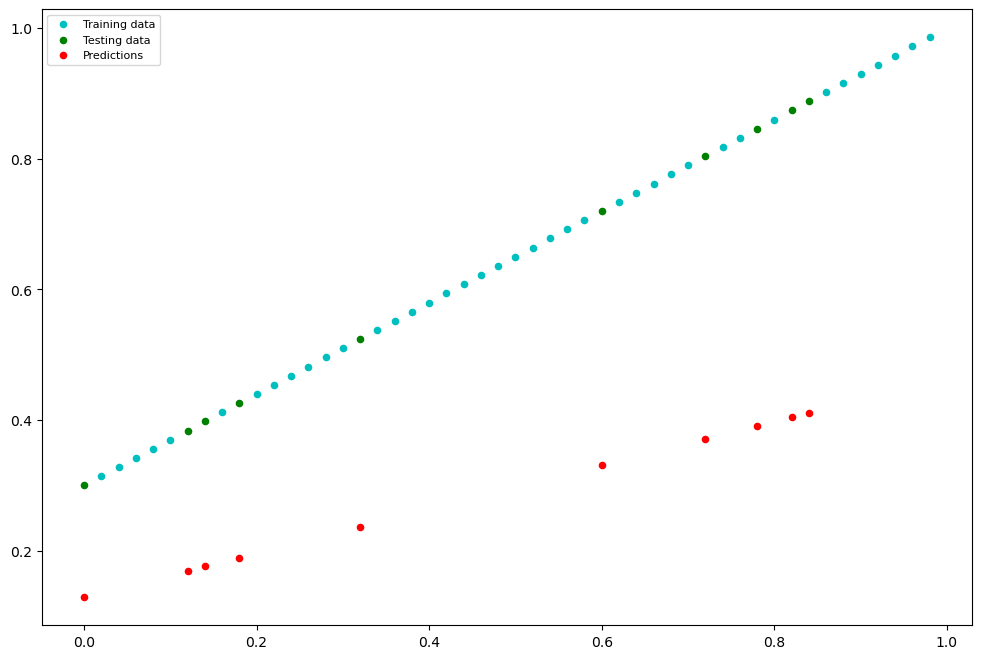

In [22]:
plot_predictions(predictions=y_preds)

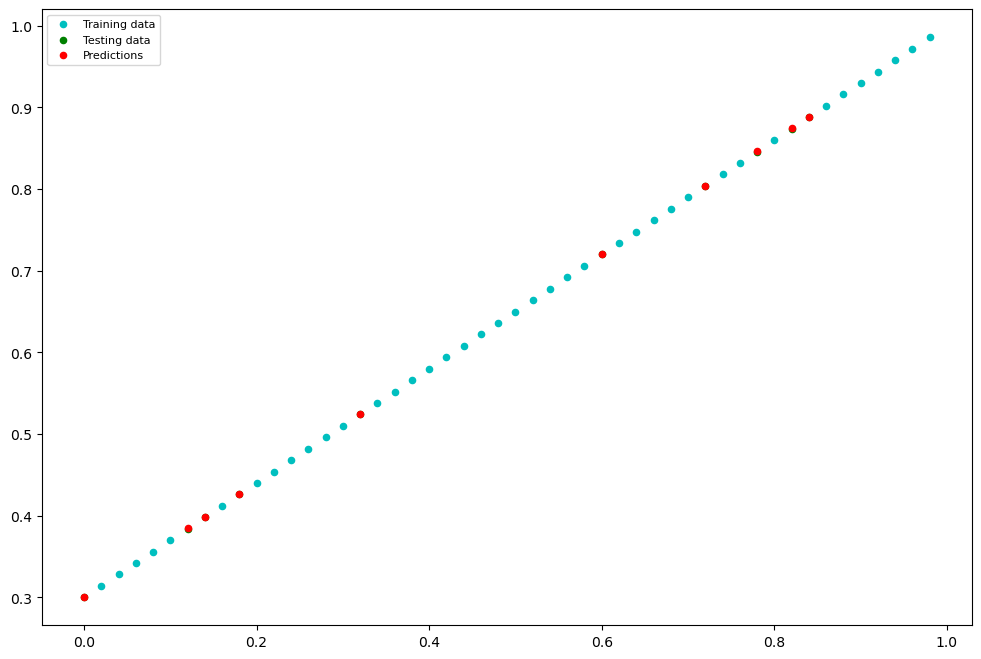

In [23]:
plot_predictions(predictions=y_preds_new)

## Saving a model in PyTorch
There are three main methods you should about for saving and loading models in
PyTorch.
1. `torch.save()` - allows you to save a PyTorch object in Python's pickle format
2. `torch.load()` - allows you to load a saved PyTorch object
3. `torch.nn.Module.load_state_dict)` - this allows loading a model's saved state dictionary

Pytorch save and load code tutorial and extra-curriculum - https://docs.pytorch.org/tutorials/beginner/saving_loading_models.html

In [24]:
# Saving our PyTorch model
from pathlib import Path

# 1. Create models directory
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create a model save path
MODEL_NAME = "01_pytorch_workflow_video_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to {MODEL_SAVE_PATH}")
torch.save(model_0.state_dict(), MODEL_SAVE_PATH)

Saving model to models/01_pytorch_workflow_video_model_0.pth


## Loading a PyTorch model

Since we saved our model's `state_dict()` rather than the entire model, we'll create a new instance of our model class and load the saved `state_dict()` into that.

In [25]:
model_0.state_dict()

OrderedDict([('weight', tensor([0.6995])), ('bias', tensor([0.3007]))])

In [26]:
# To load a saved state_dict, we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()
loaded_model_0.load_state_dict(torch.load(MODEL_SAVE_PATH))
loaded_model_0.state_dict()

OrderedDict([('weight', tensor([0.6995])), ('bias', tensor([0.3007]))])

In [27]:
# Make some predictions with our loaded model + making sure they are the same
loaded_model_0.eval()
model_0.eval()
with torch.inference_mode():
    y_preds = model_0(X_test)
    loaded_model_preds = loaded_model_0(X_test)
loaded_model_preds == y_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

## 6. Putting it all together
Let's go back through the steps above and see it all in one place.

In [28]:
# Import PyTorch
import torch
from torch import nn
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

torch.manual_seed(42)

# Check PyTorch version
torch.__version__

'2.7.1'

Create device-agnostic code.
This means if we've got access to a GPU, our code will use it (for potentially faster computing).
If no GPU is available, the code will default to using CPU.

In [29]:
# Setup device agnostic code
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cpu


### 6.1 Data

In [30]:
# Create some data using linear regression formula of y = weight * X + bias
weight = 0.7
bias = 0.3

# Create range values
start = 0
end = 1
step = 0.02

# Create X and y (features and labels)
X = torch.arange(start, end, step).unsqueeze(1) # without unsqueeze, errors will pop up
y = weight * X + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [31]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

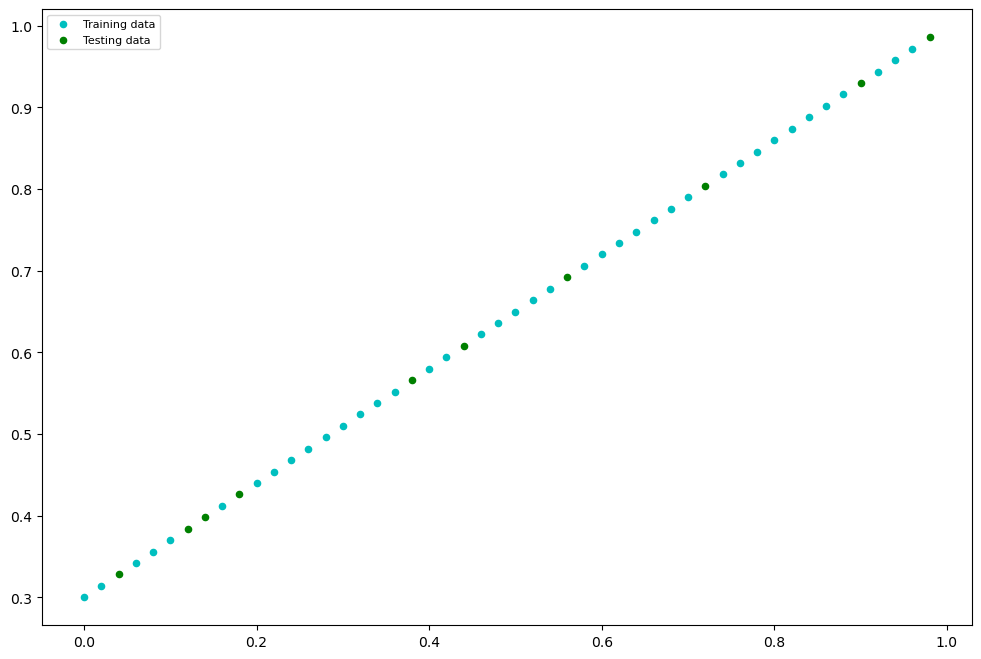

In [32]:
# Plot the data
plot_predictions(X_train, y_train,X_test, y_test)

### 6.2 Building a PyTorch Linear model

In [33]:
# Create a linear model by subclassing nn.Module
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for creating model parameters / also called: linear transform, probing layer, fully connected layer, dence layer
        self.linear_layer = nn.Linear(in_features=1, out_features=1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [34]:
X_train[:10], y_train[:10]

(tensor([[0.6800],
         [0.0800],
         [0.3600],
         [0.7000],
         [0.7400],
         [0.5200],
         [0.7600],
         [0.5400],
         [0.2800],
         [0.9400]]),
 tensor([[0.7760],
         [0.3560],
         [0.5520],
         [0.7900],
         [0.8180],
         [0.6640],
         [0.8320],
         [0.6780],
         [0.4960],
         [0.9580]]))

In [35]:
# Set the model to use target device
model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

In [36]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
             ('linear_layer.bias', tensor([0.8300]))])

### 6.3 Training

For training, we need:
* Loss function
* Optimizer
* Training loop
* Testing loop

In [37]:
# Setup loss function
loss_fn = nn.L1Loss() # Same as MAE

# Setup our optimizer
optimizer = torch.optim.SGD(model_1.parameters(), lr=0.001)

In [38]:
# Let's write a training loop
torch.manual_seed(42)
epochs = 1_500

# Put data to the target device (device-agnostic code)
X_train.to(device)
X_test.to(device)
y_train.to(device)
y_test.to(device)

epoch_count = []
loss_values = []
train_loss_values = []

for epoch in range(epochs):
    model_1.train()

    # 1. Forward pass
    y_pred = model_1(X_train)

    # 2. Calculate the loss
    loss = loss_fn(y_pred, y_train)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Perform backpropagation
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_1.eval()
    with torch.inference_mode():
        test_pred = model_1(X_test)
        test_loss = loss_fn(test_pred, y_test)

    # Printing out what's happening
    if epoch % 10 == 0:
        print(f"Epoch {epoch} | Loss: {loss} | Test Loss: {test_loss}")


Epoch 0 | Loss: 0.5623417496681213 | Test Loss: 0.5575686693191528
Epoch 10 | Loss: 0.5498319864273071 | Test Loss: 0.5453344583511353
Epoch 20 | Loss: 0.5373221635818481 | Test Loss: 0.5331002473831177
Epoch 30 | Loss: 0.5248124003410339 | Test Loss: 0.5208660364151001
Epoch 40 | Loss: 0.5123026967048645 | Test Loss: 0.5086318254470825
Epoch 50 | Loss: 0.4997928738594055 | Test Loss: 0.4963974952697754
Epoch 60 | Loss: 0.4872830808162689 | Test Loss: 0.4841632843017578
Epoch 70 | Loss: 0.4747733473777771 | Test Loss: 0.47192907333374023
Epoch 80 | Loss: 0.4622635841369629 | Test Loss: 0.45969486236572266
Epoch 90 | Loss: 0.4497538208961487 | Test Loss: 0.4474605619907379
Epoch 100 | Loss: 0.4372440278530121 | Test Loss: 0.4352263808250427
Epoch 110 | Loss: 0.4247342646121979 | Test Loss: 0.42299216985702515
Epoch 120 | Loss: 0.41222453117370605 | Test Loss: 0.4107579290866852
Epoch 130 | Loss: 0.39971476793289185 | Test Loss: 0.3985236883163452
Epoch 140 | Loss: 0.38720497488975525 | 

In [39]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6998]])),
             ('linear_layer.bias', tensor([0.3003]))])

In [40]:
weight, bias

(0.7, 0.3)

### 6.4 Making and evaluating predictions

In [41]:
# Turn into evaluation predictions
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
    y_preds = model_1(X_test)
y_preds

tensor([[0.6922],
        [0.9302],
        [0.5663],
        [0.6082],
        [0.9861],
        [0.3283],
        [0.3843],
        [0.3983],
        [0.8042],
        [0.4263]])

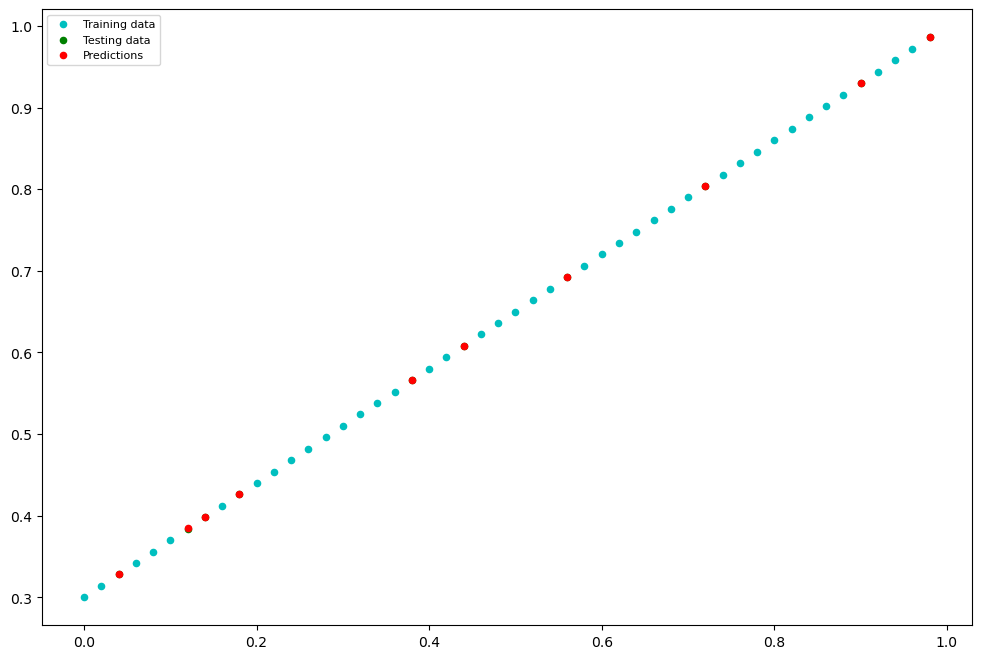

In [50]:
# Check out our model predictions visually
plot_predictions(predictions=y_preds) # Rerun the function cell to update the default params

### 6.5 Saving and loading a trained model

In [43]:
from pathlib import Path

# 1. Create models directory
Model_PATH = Path("models")
Model_PATH.mkdir(parents=True, exist_ok=True)

# 2. Create model save path
MODEL_NAME = "01_pytorch_workflow_video_model_1.pth"
MODEL_SAVE_PATH = Model_PATH / MODEL_NAME

# 3. Save the model state dict
print(f"Saving model to {MODEL_SAVE_PATH}")
torch.save(model_1.state_dict(), MODEL_SAVE_PATH)

Saving model to models/01_pytorch_workflow_video_model_1.pth


In [44]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6998]])),
             ('linear_layer.bias', tensor([0.3003]))])

In [51]:
# Load a PyTorch model

# Create a new instance of linear regression model v2
loaded_model_1 = LinearRegressionModelV2()

# load the saved model model_1 state_dict
loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

# put the loaded model to device
loaded_model_1.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [52]:
next(loaded_model_1.parameters()).device

device(type='cpu')

In [53]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6998]])),
             ('linear_layer.bias', tensor([0.3003]))])

In [54]:
# Evaluate loaded model
loaded_model_1.eval()
with torch.inference_mode():
    loaded_model_1_pred = model_1(X_test)
    loaded_model_1_loss = loss_fn(test_pred, y_test)
loaded_model_1_pred == y_preds

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

copied cell form [here](https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/01_pytorch_workflow.ipynb)

## Exercises

All exercises have been inspired from code throughout the notebook.

There is one exercise per major section.

You should be able to complete them by referencing their specific section.

> **Note:** For all exercises, your code should be device agnostic (meaning it could run on CPU or GPU if it's available).

1. Create a straight line dataset using the linear regression formula (`weight * X + bias`).
  * Set `weight=0.3` and `bias=0.9` there should be at least 100 datapoints total.
  * Split the data into 80% training, 20% testing.
  * Plot the training and testing data so it becomes visual.
2. Build a PyTorch model by subclassing `nn.Module`.
  * Inside should be a randomly initialized `nn.Parameter()` with `requires_grad=True`, one for `weights` and one for `bias`.
  * Implement the `forward()` method to compute the linear regression function you used to create the dataset in 1.
  * Once you've constructed the model, make an instance of it and check its `state_dict()`.
  * **Note:** If you'd like to use `nn.Linear()` instead of `nn.Parameter()` you can.
3. Create a loss function and optimizer using `nn.L1Loss()` and `torch.optim.SGD(params, lr)` respectively.
  * Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
  * Write a training loop to perform the appropriate training steps for 300 epochs.
  * The training loop should test the model on the test dataset every 20 epochs.
4. Make predictions with the trained model on the test data.
  * Visualize these predictions against the original training and testing data (**note:** you may need to make sure the predictions are *not* on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).
5. Save your trained model's `state_dict()` to file.
  * Create a new instance of your model class you made in 2. and load in the `state_dict()` you just saved to it.
  * Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

> **Resource:** See the [exercises notebooks templates](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/exercises) and [solutions](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions) on the course GitHub.

## Extra-curriculum
* Listen to [The Unofficial PyTorch Optimization Loop Song](https://youtu.be/Nutpusq_AFw) (to help remember the steps in a PyTorch training/testing loop).
* Read [What is `torch.nn`, really?](https://pytorch.org/tutorials/beginner/nn_tutorial.html) by Jeremy Howard for a deeper understanding of how one of the most important modules in PyTorch works.
* Spend 10-minutes scrolling through and checking out the [PyTorch documentation cheatsheet](https://pytorch.org/tutorials/beginner/ptcheat.html) for all of the different PyTorch modules you might come across.
* Spend 10-minutes reading the [loading and saving documentation on the PyTorch website](https://pytorch.org/tutorials/beginner/saving_loading_models.html) to become more familiar with the different saving and loading options in PyTorch.
* Spend 1-2 hours reading/watching the following for an overview of the internals of gradient descent and backpropagation, the two main algorithms that have been working in the background to help our model learn.
 * [Wikipedia page for gradient descent](https://en.wikipedia.org/wiki/Gradient_descent)
 * [Gradient Descent Algorithm — a deep dive](https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21) by Robert Kwiatkowski
 * [Gradient descent, how neural networks learn video](https://youtu.be/IHZwWFHWa-w) by 3Blue1Brown
 * [What is backpropagation really doing?](https://youtu.be/Ilg3gGewQ5U) video by 3Blue1Brown
 * [Backpropagation Wikipedia Page](https://en.wikipedia.org/wiki/Backpropagation)
